#와인 분류

#### 데이터 확인

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping 


import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt

In [ ]:
df_pre = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/wine.csv',header=None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


속성 12개 클래스 1개  예상

In [ ]:
# seed 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df = df_pre.sample(frac=1) # 원본 데이터중 몇% 불러옴
dataset = df.values
x= dataset[:,0:12] 
y = dataset[:,12]



모델설정 

In [ ]:
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

모델 학습

In [ ]:
model.fit(x,y,epochs=200,batch_size=200)

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 0.2857 - accuracy: 0.9028
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9309
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9358
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9383
Epoch 5/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.9355
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9380
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9443
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9381
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9425
Epoch 10/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9468
Epoch 11/

#### 결과

In [ ]:
print(model.evaluate(x,y)[1])

204/204 [==============================] - 0s 895us/step - loss: 0.0410 - accuracy: 0.9878
0.9878405332565308


98.78% 정확도

## 14.2 모델 업데이트

- 모델을 학습함과 동시에 에포크마다 저장할 수 있다
- 이를 이용해 모델의 성능이 좋아질 때만 저장한다

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping 

import os

#### 모델 저장폴더 생성, 설정

In [ ]:
# 모델 폴더 있는지 확인하고 없으면 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): 
  os.mkdir(MODEL_DIR)



#### 모델의 저장 조건

In [ ]:

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" # 모델 저장 이름, 확장자
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 모니터할 값 지정
# val_loss : 테스트 오차
# verbose:1 진행상황 출력
# save_best_only=True  전보다 나아진 모델만 저장

#### 모델실행하면서 저장

In [ ]:
model.fit(x,y,epochs=200,batch_size=200,validation_split=0.2,verbose=0,callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.04884, saving model to ./model/01-0.0488.hdf5

Epoch 00002: val_loss improved from 0.04884 to 0.04536, saving model to ./model/02-0.0454.hdf5

Epoch 00003: val_loss improved from 0.04536 to 0.04340, saving model to ./model/03-0.0434.hdf5

Epoch 00004: val_loss improved from 0.04340 to 0.04124, saving model to ./model/04-0.0412.hdf5

Epoch 00005: val_loss did not improve from 0.04124

Epoch 00006: val_loss did not improve from 0.04124

Epoch 00007: val_loss did not improve from 0.04124

Epoch 00008: val_loss did not improve from 0.04124

Epoch 00009: val_loss did not improve from 0.04124

Epoch 00010: val_loss did not improve from 0.04124

Epoch 00011: val_loss did not improve from 0.04124

Epoch 00012: val_loss did not improve from 0.04124

Epoch 00013: val_loss did not improve from 0.04124

Epoch 00014: val_loss did not improve from 0.04124

Epoch 00015: val_loss did not improve from 0.04124

Epoch 00016: val_loss did not improve from 0.04

## 14.3 그래프로 확인


모델 다시 학습및 저장

In [ ]:

history = model.fit(x,y,epochs=200,batch_size=200,validation_split=0.33)

Epoch 1/200
22/22 [==============================] - 0s 12ms/step - loss: 0.0415 - accuracy: 0.9855 - val_loss: 0.0393 - val_accuracy: 0.9902
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0402 - val_accuracy: 0.9916
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9897 - val_loss: 0.0370 - val_accuracy: 0.9916
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 8/200


#### 그래프 표현할 데이터 설정

In [ ]:
# 테스트셋 오차값
y_vloss = history.history['val_loss']

# 학습셋 정확도
y_acc= history.history['accuracy'] # 책에서 acc라 나왔는데 오류남

# x값 지정
x_len = np.arange(len(y_acc))


#### 플롯

ValueError: ignored

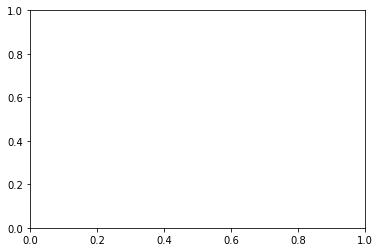

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_len,y_vloss,"0",c="red",markersize=3) # 왜 에러나는지 모르겠음
plt.plot(x_len,y_acc,"0",c="red",markersize=3)

plt.show()

####결과 
: 학습셋 정확도는 꾸준히 증가하지만 테스트셋의 정확도는 과적합하는 순간부터 떨어짐

## 14.4 학습 자동 중단
: 모델의 학습하면서 과적합 이후 테스트셋의 결과가 좋아지지 않을 때 횟수 지정해서 모델을 중단한다.

In [ ]:
from keras.callbacks import EarlyStopping

# 테스트셋 오차를 보고 100 이후에 중단
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

# 모델 학습
model.fit(x,y,epochs=1000,batch_size=200,validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0667 - val_accuracy: 0.9862
Epoch 2/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9881 - val_loss: 0.0497 - val_accuracy: 0.9900
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.0481 - val_accuracy: 0.9900
Epoch 4/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9908 - val_loss: 0.0605 - val_accuracy: 0.9869
Epoch 5/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0482 - val_accuracy: 0.9892
Epoch 6/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0525 - val_accuracy: 0.9892
Epoch 7/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0490 - val_accuracy: 0.9908
Epoch 

####결과
: 에포크가 1000 인데 127 이후로 학습 중단

## 14.5 모델 업데이트와 학습중단 같이 사용

In [ ]:
# 모델 폴더 있는지 확인하고 없으면 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): 
  os.mkdir(MODEL_DIR)


# 모델 업데이트,저장 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" # 모델 저장 이름, 확장자
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 모니터할 값 지정
# val_loss : 테스트 오차
# verbose:1 진행상황 출력
# save_best_only=True  전보다 나아진 모델만 저장


from keras.callbacks import EarlyStopping

# 테스트셋 오차를 보고 100 이후에 중단
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

# 모델 학습
model.fit(x,y,epochs=1000,batch_size=200,validation_split=0.2, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0757 - val_accuracy: 0.9877

Epoch 00001: val_loss improved from inf to 0.07567, saving model to ./model/01-0.0757.hdf5
Epoch 2/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9900 - val_loss: 0.0595 - val_accuracy: 0.9900

Epoch 00002: val_loss improved from 0.07567 to 0.05954, saving model to ./model/02-0.0595.hdf5
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0583 - val_accuracy: 0.9908

Epoch 00003: val_loss improved from 0.05954 to 0.05827, saving model to ./model/03-0.0583.hdf5
Epoch 4/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0654 - val_accuracy: 0.9885

Epoch 00004: val_loss did not improve from 0.05827
Epoch 5/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9

#### 결과
: 76 에포크에 모델 저장 후 모델성능이 좋아지지 않아서 100번 뒤인 176에서 학습 중단